In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np






`Aim:-` The objective is to predict based on diagnostic measurements whether a patient has diabetes.
italicized text

Orientation:-
- Data Description
- Data Exploration.
- Data Visualization.
- Data Preprocessing.
- Feature selection.
- Data Spliting & Training.
- Fit Model 
  1] point estimetors.
  2] range estimators.
  3] Describe estimators.
4] conclusion

`This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.`

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- `Pregnancies:` Number of times pregnant

- `Glucose:` Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- `BloodPressure:` Diastolic blood pressure (mm Hg).

- `SkinThickness:` Triceps skin fold thickness (mm).

- `Insulin:` 2-Hour serum insulin (mu U/ml).

- `BMI:` Body mass index (weight in kg/(height in m)^2).

- `DiabetesPedigreeFunction:` Diabetes pedigree function.
- `Age:` Age (years)**bold text** 

- `Outcome`: Class variable (0 or 1)

In [ ]:
data=pd.read_table("diabetes.csv",sep=",")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`infer:-`
- we have a total 768 rows & 9 columns
- total int64 dtype=7 & float=2
- we don't have a any missing values.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Around 68% of scores are within 1 standard deviation of the mean,
Around 95% of scores are within 2 standard deviations of the mean,
Around 99.7% of scores are within 3 standard deviations of the mean.

Skewness is asymmetry in a statistical distribution

`infer:-`
- from the above we can say that total avg age is 34.
- we can say that the 68% data ranges from 44 to 23 age.
so from above emperical we can say that the data has presence of outliers.
- With respect to age we can say that data is `positively skew`
i.e median < mean . 

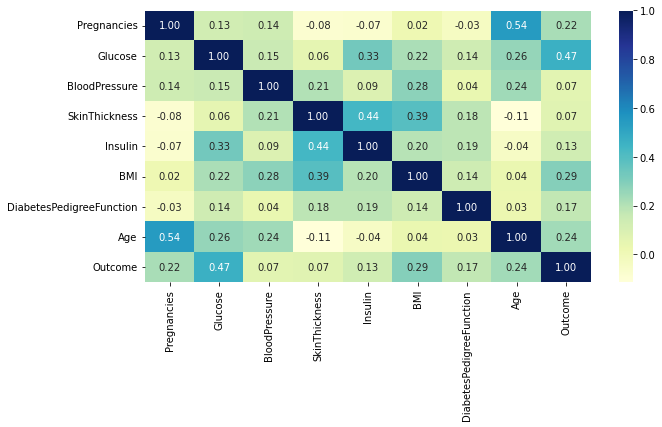

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr() ,annot=True  ,cmap='YlGnBu',fmt=".2f")

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

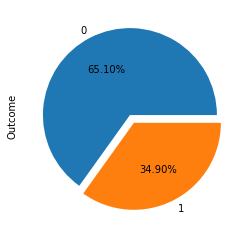

In [ ]:
data.Outcome.value_counts().plot(kind='pie',autopct="%.2f%%",explode=(0,.1))

`infer:-`
- So we have a biased data.
- we need to apply stratify sampling .

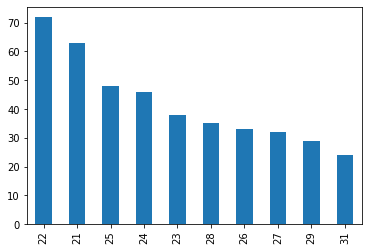

In [ ]:
data.Age.value_counts().head(10).plot(kind='bar')

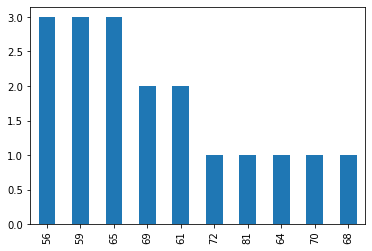

In [ ]:
data.Age.value_counts().tail(10).plot(kind='bar')

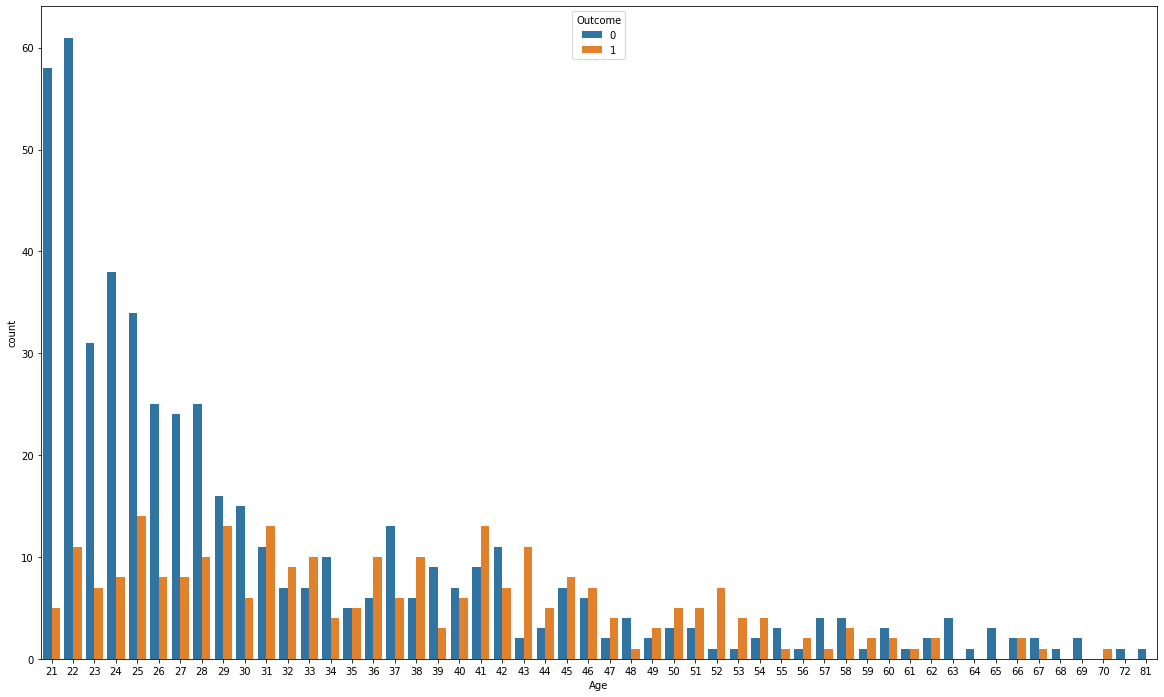

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(data=data,x='Age' , hue='Outcome')

`infer:-`

-In younger age like 21 to 30 minimun chance to a dibetic patients.







-from the graph we can say that from the middle age like from 36 to 54 . in this age more chance to be a dibetic patients.   

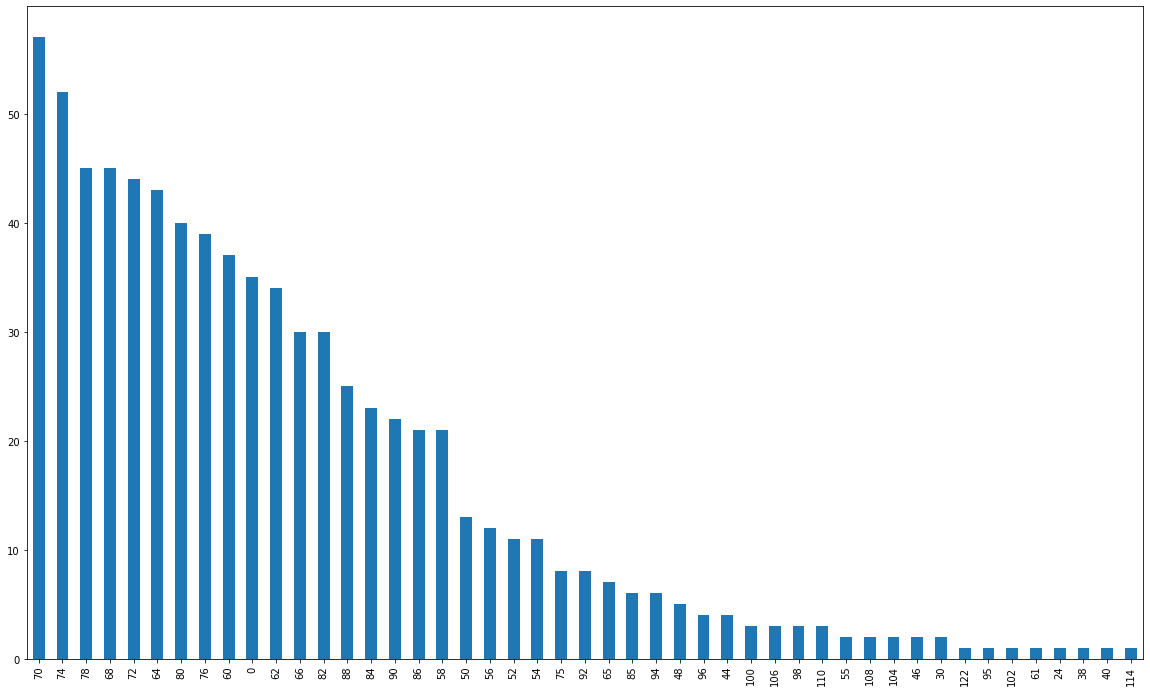

In [ ]:

plt.figure(figsize=(20,12))
data.BloodPressure.value_counts().plot(kind='bar')

  `infer:-`
  fro the above 


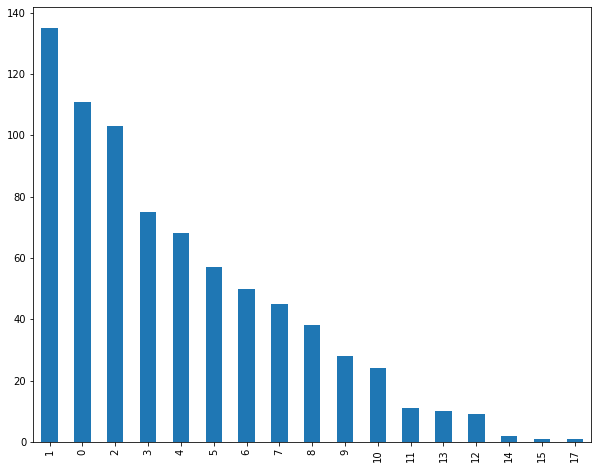

In [ ]:
plt.figure(figsize=(10,8))
data.Pregnancies.value_counts().plot(kind='bar')

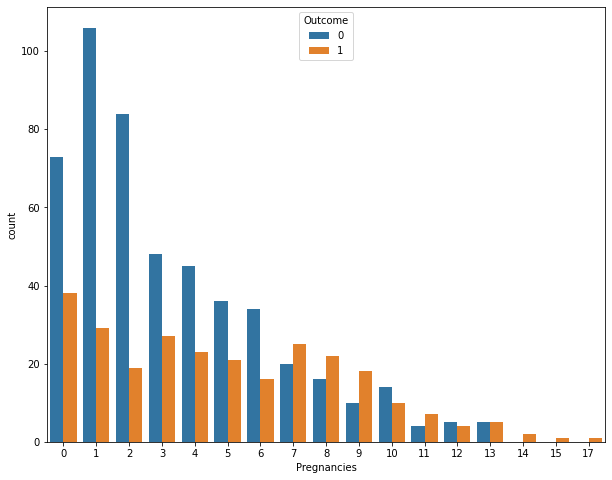

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Pregnancies' , hue='Outcome')

Pregnancies
0.8999119408414357


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


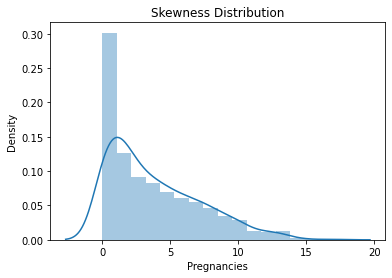

Glucose
0.17341395519987735


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


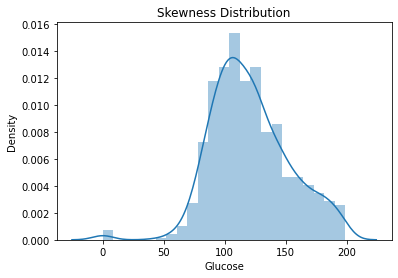

BloodPressure
-1.8400052311728738


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


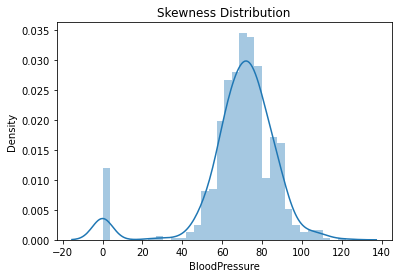

SkinThickness
0.109158762323673


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


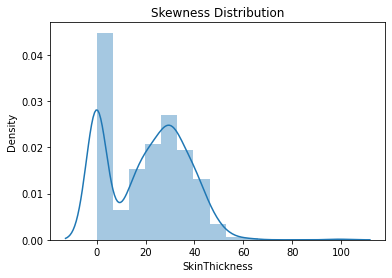

Insulin
2.2678104585131753


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


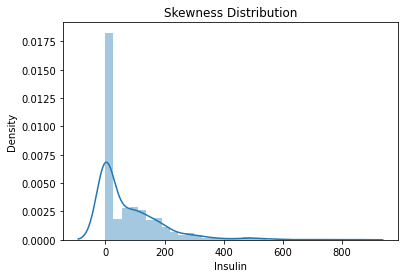

BMI
-0.42814327880861786


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


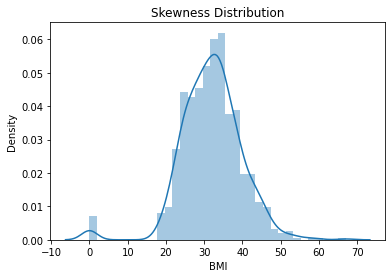

DiabetesPedigreeFunction
1.9161592037386292


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


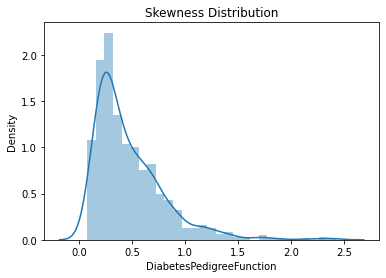

Age
1.127389259531697


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


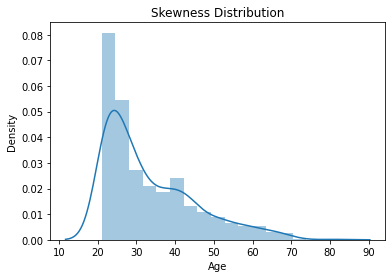

Outcome
0.6337757030614577


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


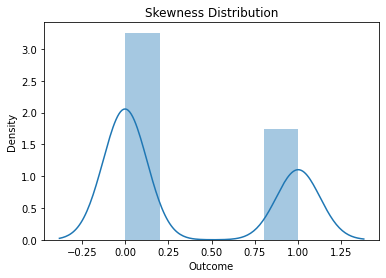

In [ ]:
#checking for skewness  :

from scipy.stats import skew

for i in data:
    print(i)
    print(skew(data[i]))
    
    sns.distplot(data[i])
    plt.title("Skewness Distribution")
    plt.show()

`infer:-`
- With respect to age we can say that 30to 34 range.
- all the skew value is accepted 

`Outliers checking:-`

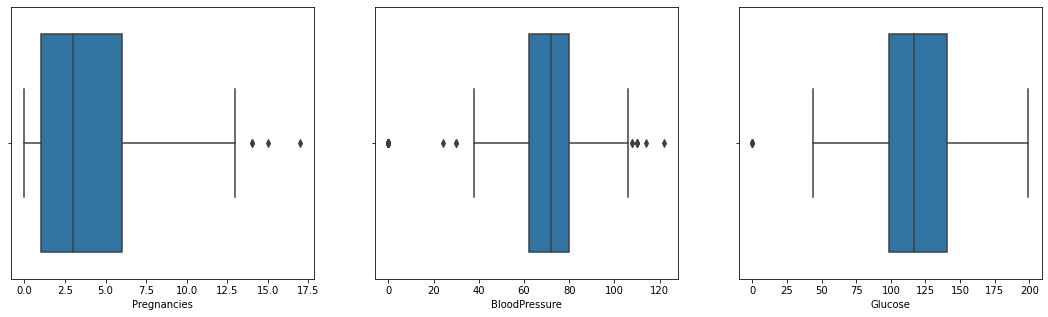

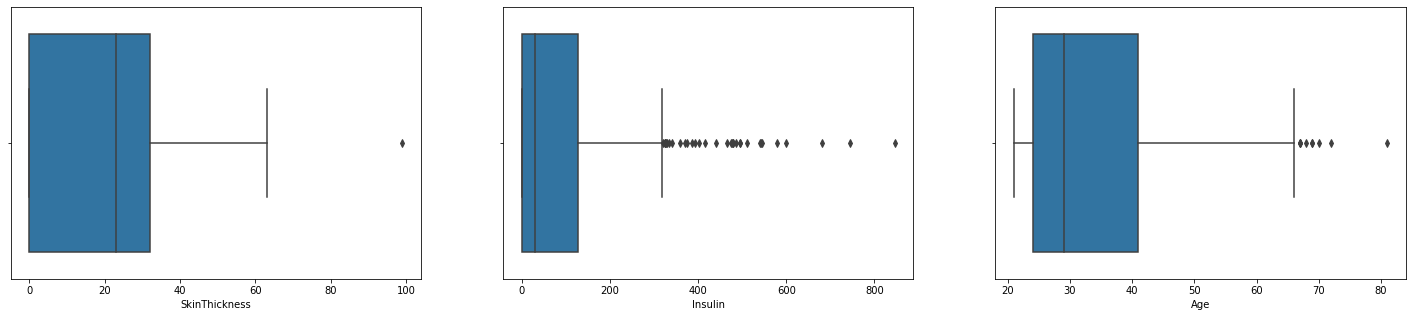

In [ ]:
#so plotting box plot : 
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Pregnancies',data=data,orient='h')

plt.subplot(1,4,2)
sns.boxplot(x='BloodPressure',data=data,orient='h')
plt.subplot(1,4,3)
sns.boxplot(x='Glucose',data=data,orient='h')

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(x='SkinThickness',data=data,orient='h')
plt.subplot(1,3,2)
sns.boxplot(x='Insulin',data=data,orient='h')
plt.subplot(1,3,3)
sns.boxplot(x='Age',data=data,orient='h')




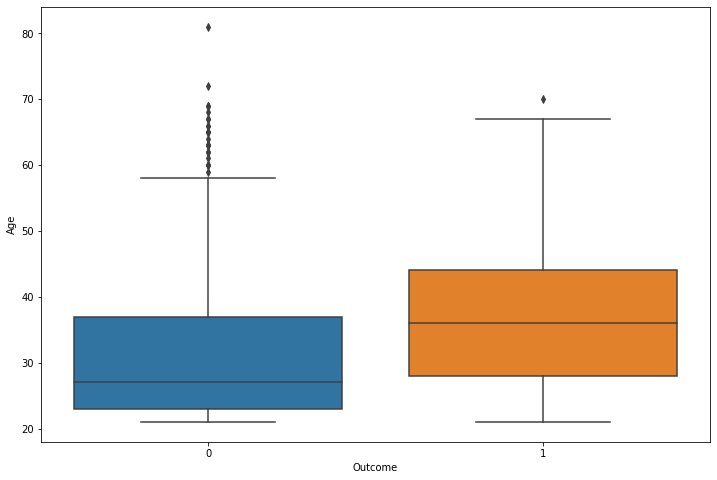

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data ,y='Age',x='Outcome')

In [ ]:
data[(data['Outcome'] ==0)  &  (data['Age']  > 60)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
148,5,147,78,0,0,33.7,0.218,65,0
223,7,142,60,33,190,28.8,0.687,61,0
263,3,142,80,15,0,32.4,0.200,63,0
294,0,161,50,0,0,21.9,0.254,65,0
361,5,158,70,0,0,29.8,0.207,63,0
362,5,103,108,37,0,39.2,0.305,65,0
453,2,119,0,0,0,19.6,0.832,72,0
456,1,135,54,0,0,26.7,0.687,62,0
459,9,134,74,33,60,25.9,0.460,81,0


`Data - preparation:-`

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data.iloc[:,:-1]=std.fit_transform(data.iloc[:,:-1])


In [ ]:
data.shape

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [ ]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

`Feature selection:-`

In [ ]:
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

`Data splitting:-`

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=1,stratify=y)



`LogisticRegression :-`

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

print("default_parameter")
"""penalty='l2',  dual=False,  tol=0.0001,  C=1.0, 
fit_intercept=True,intercept_scaling=1,  solver='lbfgs', 
max_iter=100,  multi_class='auto'"""
 

  
 

default_parameter


"penalty='l2',  dual=False,  tol=0.0001,  C=1.0, \nfit_intercept=True,intercept_scaling=1,  solver='lbfgs', \nmax_iter=100,  multi_class='auto'"

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train=logreg.predict(X_train)
y_pred_test=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.57%
Accuracy: 78.66%


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.66%


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred_test)
cnf_matrix

array([[92,  8],
       [25, 29]])

Text(0.5, 257.44, 'Predicted label')

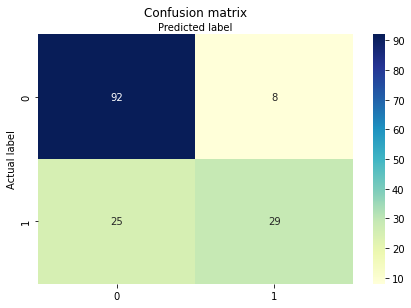

In [ ]:
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



`Cross-validation:-`

In [ ]:
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
# suppress warnings
warnings.filterwarnings('ignore')
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=25)
score=cross_val_score(logreg,X,y,cv=fold)
print(score)
print(score.mean())

[0.78571429 0.77922078 0.77272727 0.77777778 0.75163399]
0.7734148204736441


`Grid_Search_CV :-`

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
# suppress warnings
warnings.filterwarnings('ignore')

fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=25)

parameters= {'penalty':("l1","l2"),'solver':['newton-cg', 'sag','lbfgs','liblinear'],'C':[1.0,5,30],'max_iter':(100,200,500)}

grid = GridSearchCV(estimator=logreg  ,param_grid=parameters, cv=fold ,scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=25, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 5, 30], 'max_iter': (100, 200, 500),
                         'penalty': ('l1', 'l2'),
                         'solver': ['newton-cg', 'sag', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7785552445688391
{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(solver='newton-cg')


In [ ]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
logreg=LogisticRegression(solver= 'newton-cg',max_iter=100)

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_pred_train=logreg.predict(X_train)
y_pred_test=logreg.predict(X_test)

In [ ]:
y_pred_train=logreg.predict(X_train)
y_pred_test=logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.57%
Accuracy: 78.66%


In [ ]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=25)

In [ ]:
from sklearn.model_selection import cross_val_score
test_score=cross_val_score(logreg,X,y,scoring="accuracy",cv=fold)

test_score_f=np.mean(abs(test_score))

print(test_score)
print(test_score_f)

[0.78571429 0.77922078 0.77272727 0.77777778 0.75163399]
0.7734148204736441


## `SVM:-`

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
print("train_accurcy:-",svm.score(X_train,y_train))
print("test_accurcy:-",svm.score(X_test,y_test))

train_accurcy:- 0.8403908794788274
test_accurcy:- 0.7207792207792207


`infer:-`
* from the above training and testing score our model is  `overfitted`  i.e low bias & high varrience


* we need a genralize model where low bias and low varrience . 

`Cross-validation:-`

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score=cross_val_score(svm,X,y,cv=fold)
f_score=np.mean(abs(score))
print("the_svm_cross_values:",score)
print("the_svm_score:",f_score)

the_svm_cross_values: [0.76623377 0.81168831 0.77922078 0.7254902  0.68627451]
the_svm_score: 0.753781512605042


`Hyper-parm-tunning:-`

In [ ]:
model_svm=SVC(kernel='rbf',
    degree=3)

In [ ]:
model_svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_train=model_svm.predict(X_train)
y_pred_test=model_svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 72.08%
Accuracy: 84.04%


`Hyper-parm-tunning:-`

In [ ]:
str""

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5,random_state=10,shuffle=True)

#hyperparmeters:
parameters={'kernel':[ 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1,100,1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'degree':[1,2,3,4,5]}

grid_score=GridSearchCV(estimator=svm  ,param_grid=parameters, cv=fold ,scoring='accuracy')

grid_score.fit(X_train,y_train)

In [ ]:
grid_score.best_params_

In [ ]:
grid_score.best_estimator_ 

In [ ]:
grid_score.best_score_

In [ ]:

svm_hyp=SVC( kernel= 'rbf',C= 1000, gamma= 0.0001,degree=1)


In [ ]:
svm_hyp.fit(X_train,y_train)

In [ ]:
y_pred_train=svm_hyp.predict(X_train)
y_pred_test=svm_hyp.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
y_train_pred=svm_hyp.predict(X_train)
y_test_pred=svm_hyp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cns=confusion_matrix(y_test,y_test_pred)
cns

`DECISION-TREE:--|`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_t=DecisionTreeClassifier()

In [ ]:
dec_t.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train=dec_t.predict(X_train)
y_pred_test=dec_t.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 72.73%
Accuracy: 100.00%


In [ ]:
y_train_pred=dec_t.predict(X_train)
y_test_pred=dec_t.predict(X_test)



```
# This is formatted as code
```

`infer:-`
- from the above result our model is `overfitted` . so to avoid this we use,

1} prunning

2} Random-forest

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm


array([[80, 20],
       [22, 32]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



[Text(0.42088857323232326, 0.96875, 'X[1] <= 0.207\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.15585542929292928, 0.90625, 'X[7] <= -0.403\ngini = 0.303\nsamples = 382\nvalue = [311, 71]'),
 Text(0.08585858585858586, 0.84375, 'X[5] <= 1.702\ngini = 0.14\nsamples = 211\nvalue = [195, 16]'),
 Text(0.06565656565656566, 0.78125, 'X[0] <= 1.085\ngini = 0.126\nsamples = 208\nvalue = [194, 14]'),
 Text(0.05555555555555555, 0.71875, 'X[5] <= -0.088\ngini = 0.118\nsamples = 207\nvalue = [194, 13]'),
 Text(0.020202020202020204, 0.65625, 'X[6] <= 0.604\ngini = 0.017\nsamples = 117\nvalue = [116, 1]'),
 Text(0.010101010101010102, 0.59375, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(0.030303030303030304, 0.59375, 'X[6] <= 0.648\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.020202020202020204, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04040404040404041, 0.53125, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.09090909090909091, 0.65625, 'X

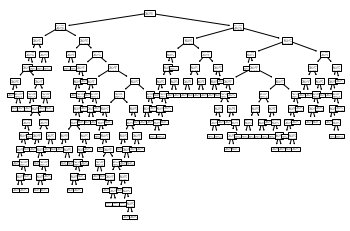

In [ ]:
from sklearn import tree

tree.plot_tree(dec_t.fit(X_train, y_train)) 

[Text(0.42088857323232326, 0.96875, 'X[1] <= 0.207\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.15585542929292928, 0.90625, 'X[7] <= -0.403\ngini = 0.303\nsamples = 382\nvalue = [311, 71]'),
 Text(0.08585858585858586, 0.84375, 'X[5] <= 1.702\ngini = 0.14\nsamples = 211\nvalue = [195, 16]'),
 Text(0.06565656565656566, 0.78125, 'X[0] <= 1.085\ngini = 0.126\nsamples = 208\nvalue = [194, 14]'),
 Text(0.05555555555555555, 0.71875, 'X[5] <= -0.088\ngini = 0.118\nsamples = 207\nvalue = [194, 13]'),
 Text(0.020202020202020204, 0.65625, 'X[6] <= 0.604\ngini = 0.017\nsamples = 117\nvalue = [116, 1]'),
 Text(0.010101010101010102, 0.59375, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(0.030303030303030304, 0.59375, 'X[6] <= 0.648\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.020202020202020204, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04040404040404041, 0.53125, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.09090909090909091, 0.65625, 'X

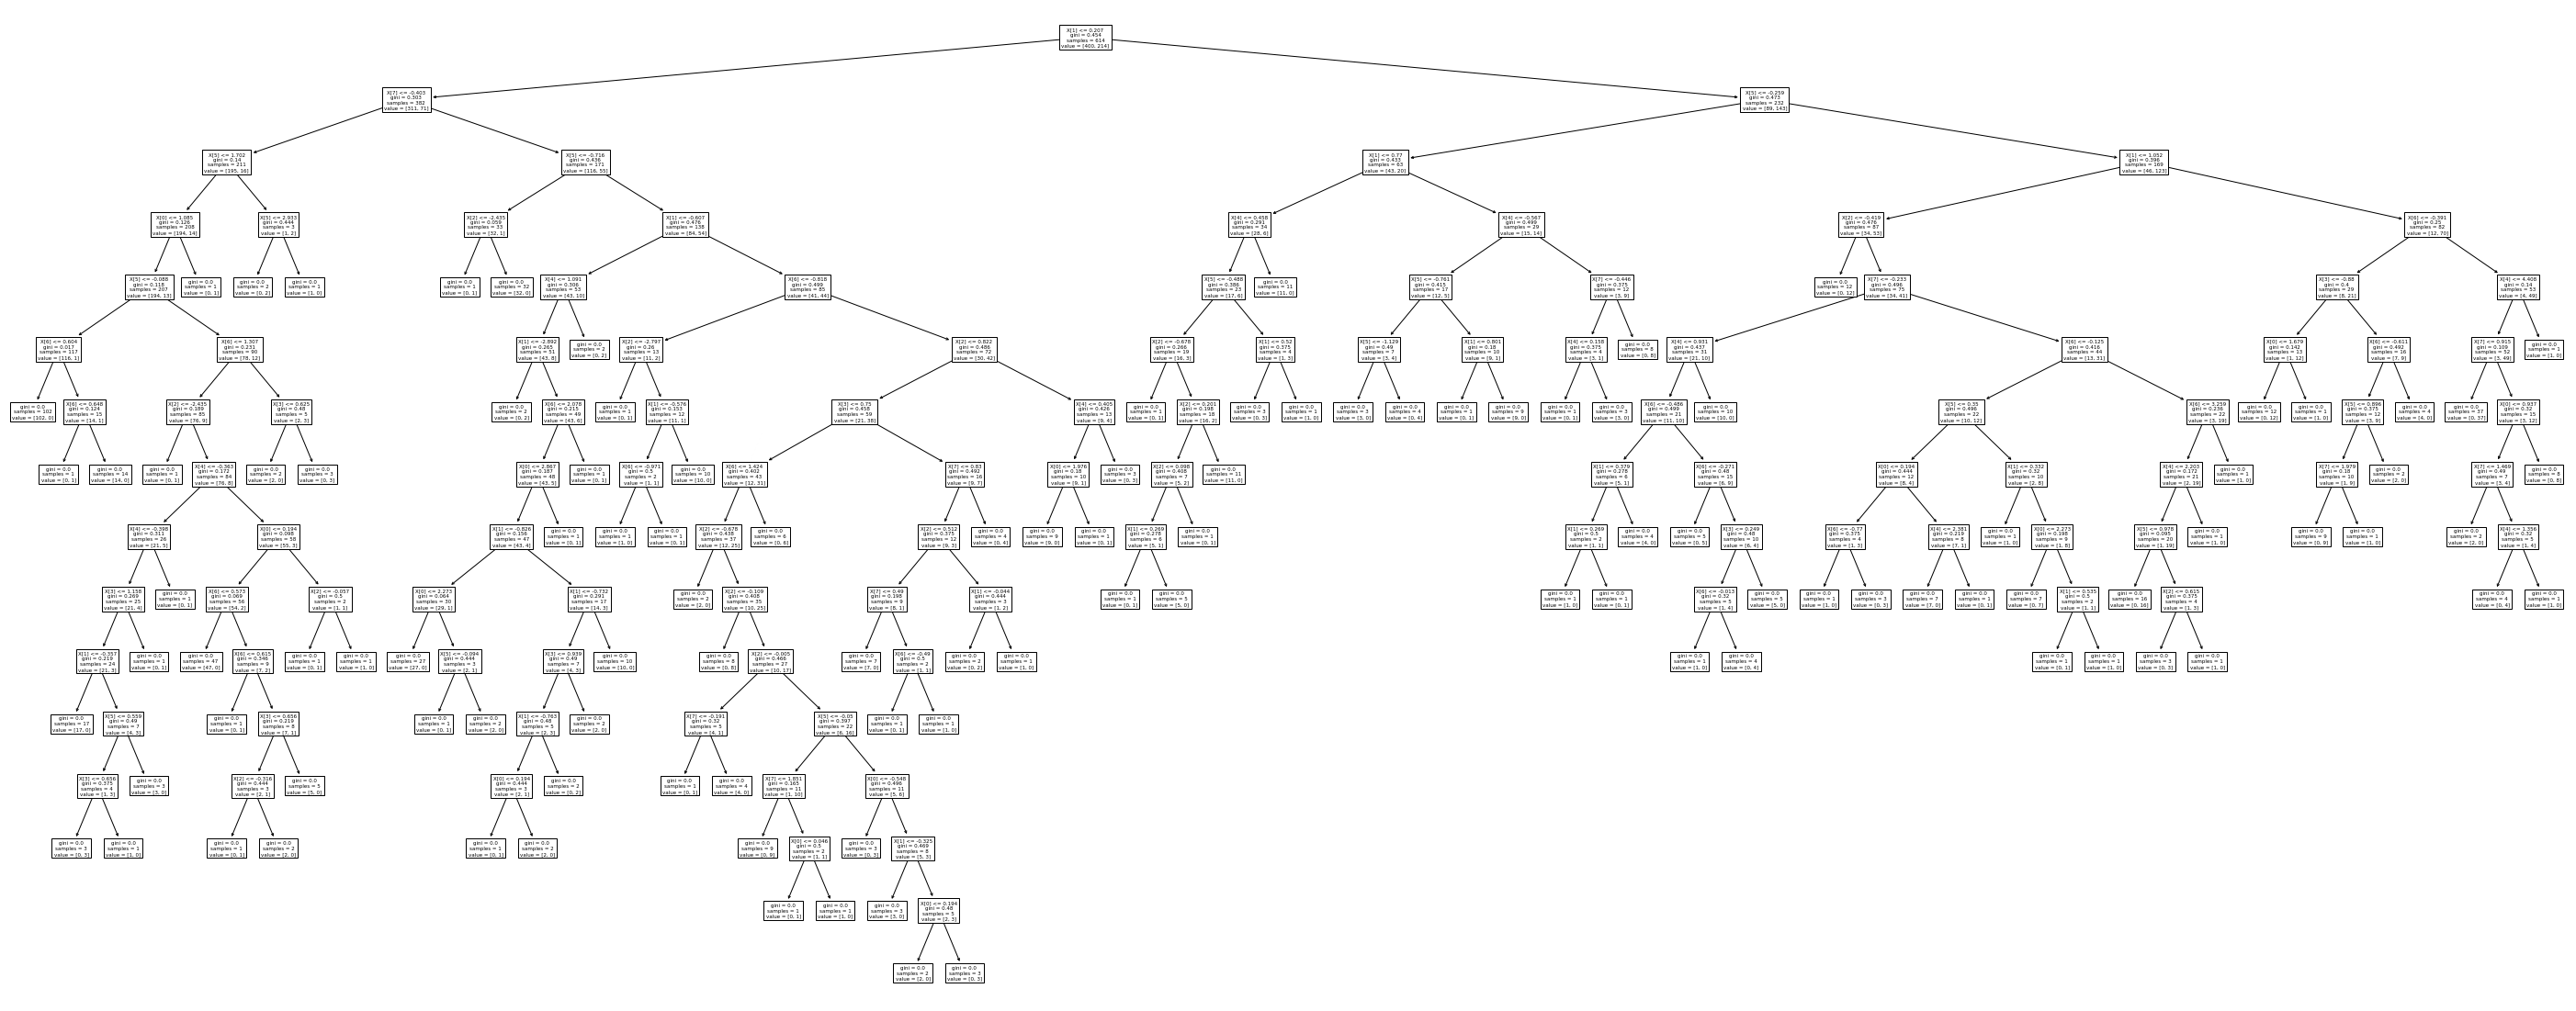

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,20))
tree.plot_tree(dec_t)

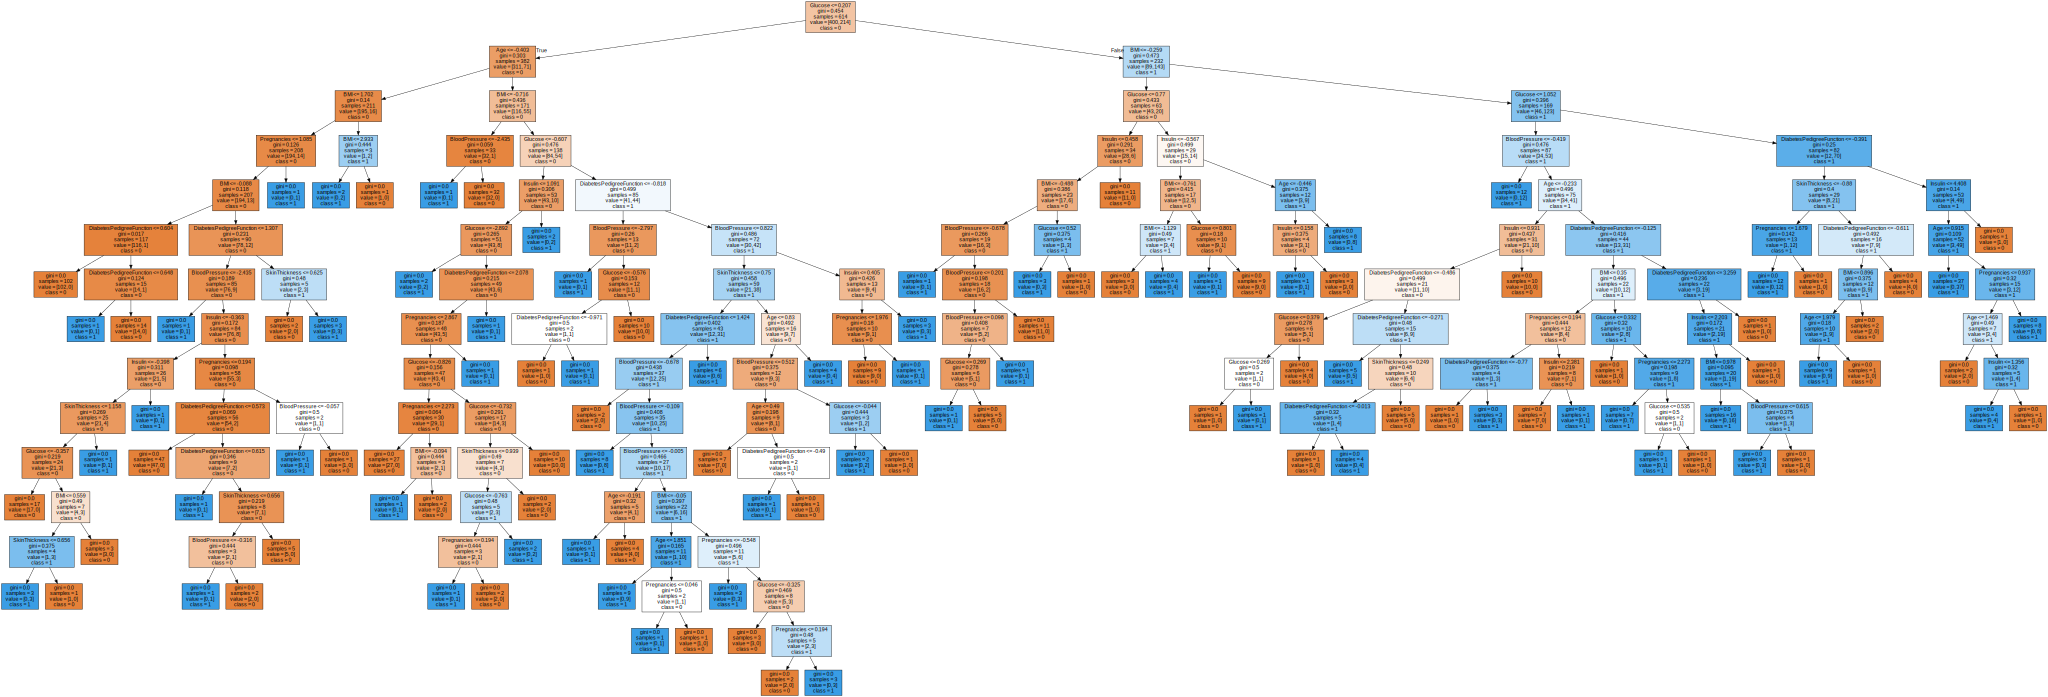

In [ ]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = tree.export_graphviz(dec_t, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=["0","1"],  
                              filled=True   
                             )

 
graph = graphviz.Source(dot_data) 

graph 

`Hyperparameter-tunning:-`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_e=DecisionTreeClassifier(criterion='entropy')


In [ ]:
dec_e.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dec_e.score(X_train,y_train)

1.0

In [ ]:
dec_e.score(X_test,y_test)

0.6753246753246753

In [ ]:
y_train_pred=dec_e.predict(X_train)
y_test_pred=dec_e.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cns=confusion_matrix(y_test,y_test_pred)
cns

array([[78, 22],
       [28, 26]])

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



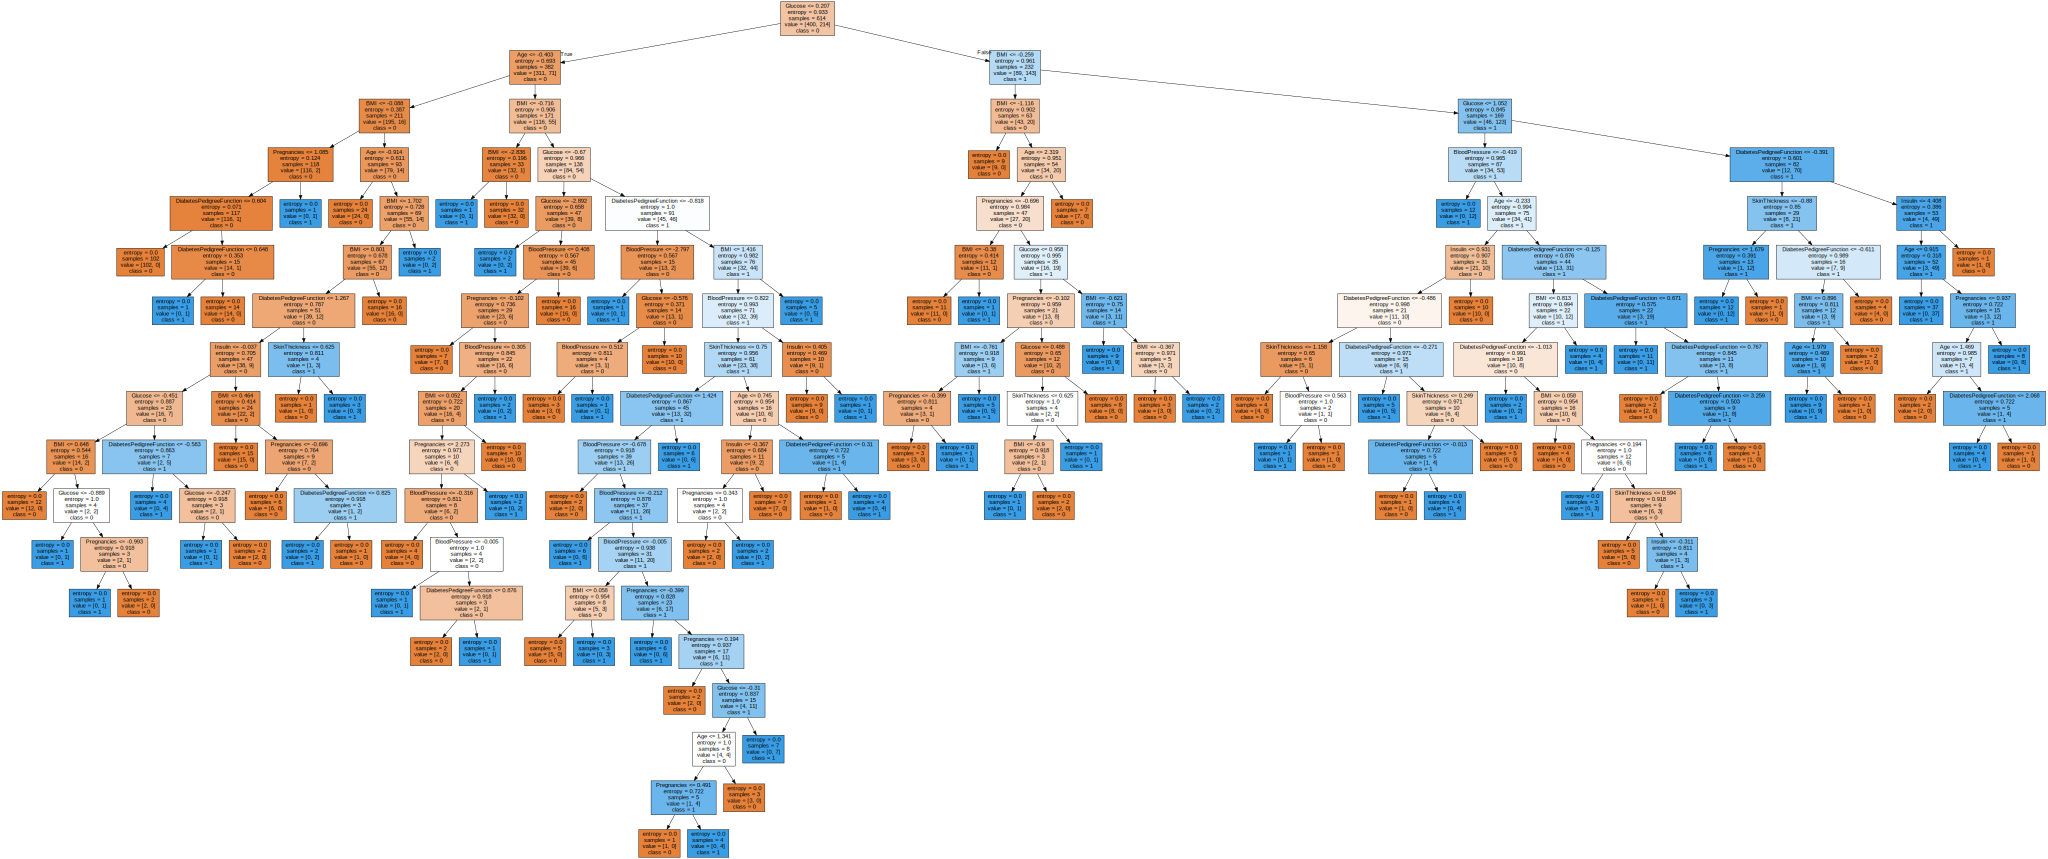

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(dec_e,feature_names=X_train.columns,
    class_names=["0","1"],
    label='all',
    filled=True)
graph=graphviz.Source(dot_data)
graph

`Prunning:-`

In [ ]:
dec_e=DecisionTreeClassifier(criterion='entropy',max_depth=4)


In [ ]:
dec_e.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred_train=dec_e.predict(X_train)
y_pred_test=dec_e.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.38%
Accuracy: 78.18%


`Hyperparameter-tunning:-`

In [ ]:
dec=DecisionTreeClassifier()

In [ ]:
str""

In [ ]:
params = {"criterion": ("gini", "entropy"), 
          "splitter": ("best", "random"), 
          "max_depth": np.arange(1, 20), 
          "min_samples_split": [2, 3, 4], 
          "min_samples_leaf": np.arange(1, 20)}
tree1_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="accuracy", cv=20)
tree1_grid.fit(X_train, y_train)

In [ ]:
print(tree1_grid.best_params_)
print(tree1_grid.best_score_)
print(tree1_grid.best_estimator_)


In [ ]:
dec_g=DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42,
                       splitter='random')


In [ ]:
dec_g.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42,
                       splitter='random')

In [ ]:
print(dec_g.score(X_train,y_train))
print(dec_g.score(X_test,y_test))

0.8436482084690554
0.6753246753246753


In [ ]:
y_train_pred=dec_g.predict(X_train)
y_test_pred=dec_g.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)


array([[81, 19],
       [31, 23]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       100
           1       0.55      0.43      0.48        54

    accuracy                           0.68       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.66      0.68      0.66       154



`Random-forest:-`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=350,random_state=2,max_features=0.75,max_depth=15)
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_features=0.75, n_estimators=350,
                       random_state=2)

In [ ]:
y_test_pred = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[85, 15],
       [24, 30]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [ ]:
from sklearn.metrics import *
model_list = [LogisticRegression(),LogisticRegression(solver= 'newton-cg',max_iter=100), 
              SVC(),SVC( kernel= 'rbf',C= 1000, gamma= 0.0001,degree=1),
              DecisionTreeClassifier(criterion='entropy'),
              DecisionTreeClassifier(criterion='entropy',max_depth=4),
              DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42,
                       splitter='random'),
              DecisionTreeClassifier(),RandomForestClassifier() ]
model_list1=[]
accuracy=[]
f1=[] 
recall=[]
precision=[]


for model in model_list:
    model_list1.append(str(model))
    model.fit(X_train , y_train)
    y_pred_test = model.predict(X_test) 

    accuracy.append(round(accuracy_score(y_test, y_pred_test) , 2))

    f1.append(round(f1_score(y_test , y_pred_test) , 2))

    recall.append(round(recall_score(y_test , y_pred_test) , 2))

    precision.append(round(precision_score(y_test , y_pred_test) , 2))
    

In [ ]:
dict = {'Model':model_list1, 'Accuracy_test':accuracy , 'F1_score':f1 ,   'recall':recall,"precision_score":precision}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy_test')
model_df

,Model,Accuracy_test,F1_score,recall,precision_score
0,LogisticRegression(),0.79,0.64,0.54,0.78
1,LogisticRegression(solver='newton-cg'),0.79,0.64,0.54,0.78
3,"SVC(C=1000, degree=1, gamma=0.0001)",0.78,0.63,0.54,0.76
5,"DecisionTreeClassifier(criterion='entropy', ma...",0.75,0.68,0.76,0.62
8,RandomForestClassifier(),0.75,0.58,0.50,0.69
2,SVC(),0.72,0.52,0.43,0.66
7,DecisionTreeClassifier(),0.72,0.58,0.56,0.61
4,DecisionTreeClassifier(criterion='entropy'),0.68,0.51,0.48,0.55
6,"DecisionTreeClassifier(criterion='entropy', ma...",0.68,0.48,0.43,0.55
